In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';')

In [3]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
df.shape

(70000, 13)

In [5]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardio', ylabel='count'>

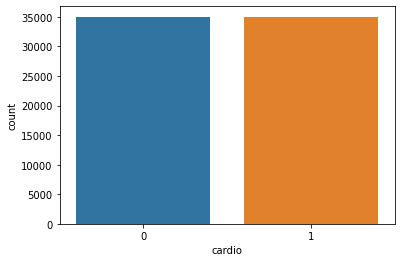

In [6]:
seaborn.countplot(df['cardio'])

In [7]:
#is there any null value?
df.isnull().values.any()

False

In [8]:
df.isna().sum() #there is no null value

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

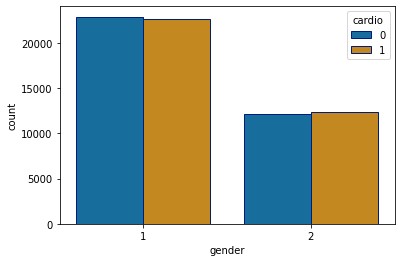

In [9]:
seaborn.countplot(x='gender', hue='cardio',data=df,palette='colorblind',edgecolor=seaborn.color_palette('dark',n_colors=1))

In [10]:
df['yr']=(df['age']/365).round(0)

<AxesSubplot:xlabel='yr', ylabel='count'>

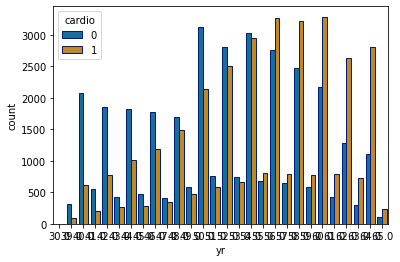

In [11]:
seaborn.countplot(x='yr', hue='cardio',data=df,palette='colorblind',edgecolor=seaborn.color_palette('dark',n_colors=1))

In [12]:
#Spliting of train test
#before that we can see the mean median and everything about the data by
#df.describe() #df.corr()
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yr
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


In [13]:
#droping unusual data

df=df.drop(['id'],axis=1)

In [14]:
#saperating x, y or features and lebels
#df=df.drop(['yr'],axis=1)
x=df.iloc[:,:-1]
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [15]:
y=df.iloc[:,11]
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [16]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.30,random_state=1)

In [18]:
xtrain

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
23561,16136,2,169,71.0,100,80,1,1,1,0,1,0
34858,14615,1,158,69.0,140,80,2,1,0,0,1,1
54953,20507,1,164,65.0,120,80,1,1,0,0,1,0
59230,16720,1,153,53.0,100,60,1,1,0,0,1,0
1730,21050,1,159,71.0,140,90,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49100,21289,2,175,78.0,120,80,1,1,0,0,1,1
20609,19116,1,164,68.0,120,80,1,1,0,0,0,0
21440,18049,2,178,82.0,120,80,1,1,0,0,1,0
50057,21957,1,169,77.0,120,80,1,1,0,0,0,1


In [19]:
#Using Random Forest model
from sklearn.ensemble import RandomForestClassifier

In [20]:
Rclf= RandomForestClassifier()

In [21]:
#training or fitting data
Rclf.fit(xtrain,ytrain)

RandomForestClassifier()

In [22]:
Rclf.score(xtest,ytest)

1.0

In [23]:
# by decition tree classifier
from sklearn.tree import DecisionTreeClassifier

In [24]:
clf=DecisionTreeClassifier()

In [25]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [26]:
Rclf.score(xtest,ytest)

1.0

In [27]:
#Algorithm naive bayes--- GaussianNB
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(xtrain,ytrain)

GaussianNB()

In [28]:
model.score(xtest,ytest)

0.9997619047619047

# K-Fold Cross Validation

In [29]:
from sklearn.model_selection import cross_val_score

In [35]:
#cross validation for model gaussianNB (naive bayes)
cv_score_NB= cross_val_score(model,x,y,cv=10) 
#if there is alphabetical value or catagorical value then we have to preprocess the dataset with encoder or vectorizer

In [36]:
cv_score_NB

array([1.        , 1.        , 0.99971429, 0.99985714, 1.        ,
       0.99957143, 0.99942857, 0.99971429, 1.        , 0.99971429])

In [41]:
cv_score_NB.mean()

0.9997999999999999

In [38]:
#cross validation for Random forest classifier
cv_score_RFC= cross_val_score(Rclf,x,y,cv=10) 
#if there is alphabetical value or catagorical value then we have to preprocess the dataset with encoder or vectorizer

In [39]:
cv_score_RFC

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])